# Plotting

### Chapters:
* [How to plot with Pandas and Bokeh](#How-to-plot-with-Pandas-and-Bokeh)

Our data set is already prepared in a csv format.

In [1]:
# import what we need
import os
import numpy as np
import pandas as pd
import bokeh
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from bokeh.palettes import Colorblind, inferno
import spacy

In [2]:
nlp = spacy.load('en')
matplotlib.style.use('ggplot')
%matplotlib inline  
output_notebook()

Loading BokehJS ...

### Reload the data into Pandas.

In [3]:
BASE = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))

In [4]:
DF_PARQUET = os.path.join(BASE, "data/cleaned/offers.parquet")

In [5]:
df = pd.read_parquet(DF_PARQUET, engine="pyarrow")

## How to plot with Pandas and Bokeh

We count how many times each tag is used:

In [6]:
tags_counting = df['tag'].value_counts()

In [7]:
tags_counting.head(20)

javascript             199
java                   189
python                 123
reactjs                 77
sql                     73
php                     64
amazon-web-services     54
linux                   51
docker                  51
scala                   50
css                     48
ruby                    47
mysql                   42
ios                     40
node.js                 39
html5                   35
angularjs               32
frontend                30
html                    30
sysadmin                30
Name: tag, dtype: int64

In [8]:
len(tags_counting)

816

In [9]:
tags_counting.describe()

count    816.000000
mean       4.551471
std       13.096707
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      199.000000
Name: tag, dtype: float64

Number of tags used less than 10 times

In [10]:
less_common_tags = tags_counting[tags_counting < 10]
len(less_common_tags)

741

In [11]:
most_used_tags = tags_counting[:12]

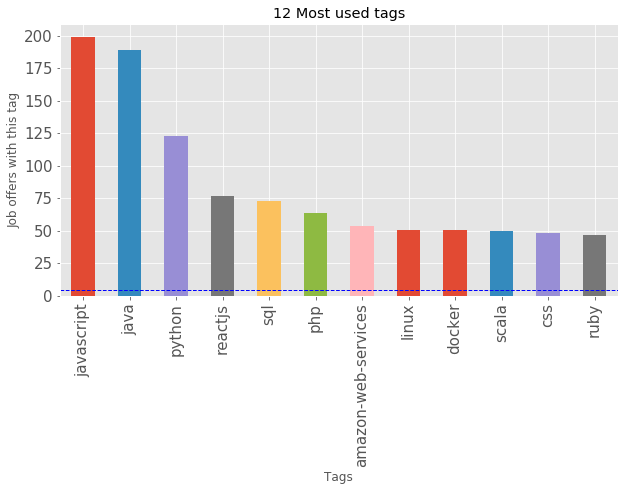

In [12]:
ax = most_used_tags.plot(
    kind='bar',
    figsize=(10,5),
    fontsize=15,
    title="12 Most used tags"
)
ax.axhline(y=tags_counting.mean(), color='b', label='Average', linestyle='--', linewidth=1)
ax.set(xlabel='Tags', ylabel='Job offers with this tag')
plt.show()

In [13]:
other_tags = tags_counting[-40:]
other_tags

datasets                  1
supply-technology         1
continuous-delivery       1
optimization              1
web-service               1
fraud-prevention          1
gtm                       1
it-helpdesk               1
event-sourcing            1
android-espresso          1
rubygems                  1
mobile-development        1
testful                   1
computer-science          1
webrtc                    1
documentation             1
python-3.x                1
tv-marketing              1
single-sign-on            1
teradata                  1
puthon                    1
hardware-programming      1
english                   1
javescript                1
airflow                   1
phd                       1
data-vault                1
router                    1
reliability               1
cad                       1
payment                   1
head-of-engineering       1
dagger                    1
google-app-engine         1
managing-teams            1
99chairs            

Now want to consider the each job offer, without considering tags, so they must be unique.

In [14]:
grouped = df.drop(["tag"], axis=1)
grouped = grouped.drop_duplicates()

In [15]:
grouped.head()

,job_id,published_on,description,slug,updated_on,company,link,role
0,68396,2017-10-11 14:15:18,MEDWING is building an end-to-end staffing and...,ruby-on-rails-devop-engineer-mf-medwing,2017-10-11 13:31:20,MEDWING,http://berlinstartupjobs.com/engineering/ruby-...,Ruby on Rails DevOp Engineer (m/f)
1,68390,2017-10-11 13:43:16,We are looking for a highly motivated System A...,system-administrator-fm-modomoto-curated-shopp...,2017-10-11 13:20:52,Modomoto (Curated Shopping GmbH),http://berlinstartupjobs.com/engineering/syste...,System Administrator (f/m)
2,68376,2017-10-11 13:33:00,Join our amazing development team and help us ...,senior-frontend-engineer-idagio,2017-10-11 12:58:05,IDAGIO,http://berlinstartupjobs.com/engineering/senio...,Senior Frontend Engineer
3,68392,2017-10-11 13:25:40,Panono develops trend-setting digital cameras ...,senior-backend-engineer-panono,2017-10-11 13:25:40,Panono,http://berlinstartupjobs.com/engineering/senio...,SENIOR BACKEND ENGINEER
4,68354,2017-10-11 13:02:53,Get the unique opportunity to leave your mark ...,lead-frontend-engineer-loopline-systems,2017-10-11 12:53:38,Loopline Systems,http://berlinstartupjobs.com/engineering/lead-...,Lead Frontend Engineer


In [16]:
sorted_number_offers = grouped.groupby("company")['job_id'].count().sort_values(ascending=False)

In [17]:
sorted_number_offers.describe()

count    415.000000
mean       2.007229
std        2.143960
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       27.000000
Name: job_id, dtype: float64

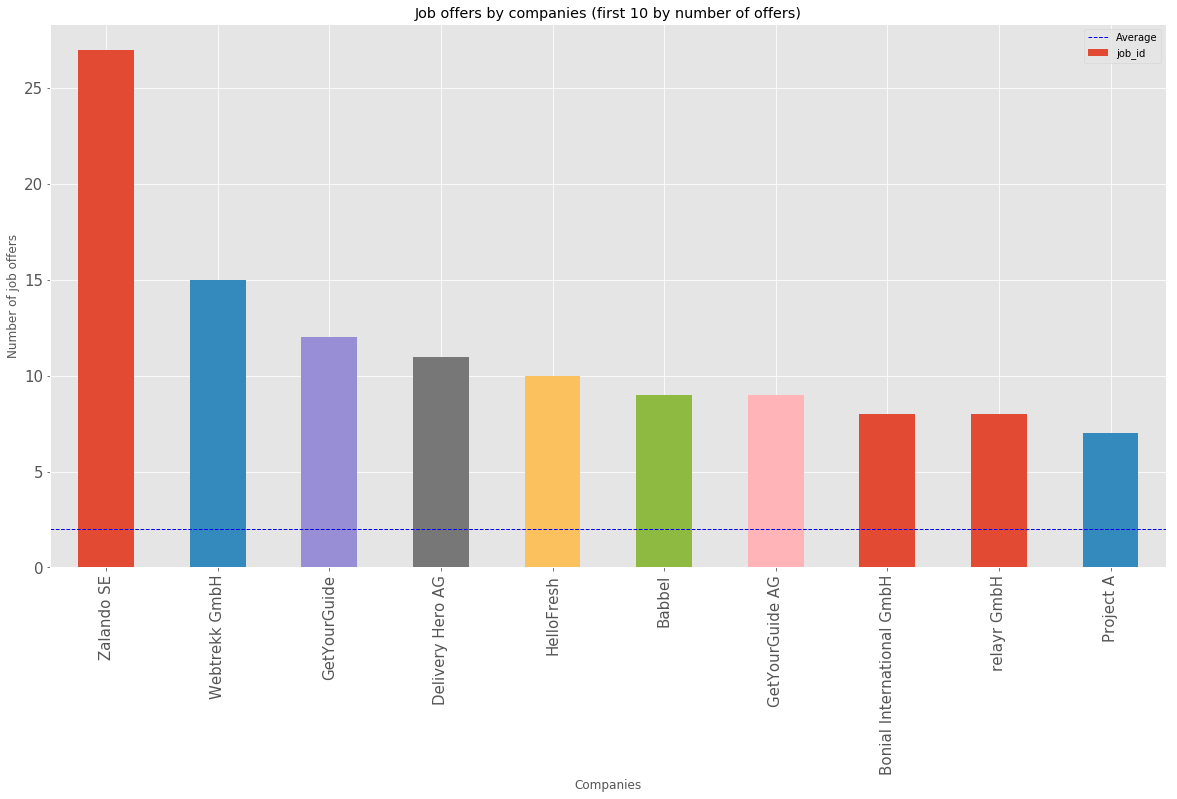

In [18]:
# first 10 companies with most job offers
ax = sorted_number_offers[:10].plot(
    title="Job offers by companies (first 10 by number of offers)",
    kind='bar',
    figsize=(20,10),
    fontsize=15,
    legend=False,
)
ax.axhline(y=sorted_number_offers.mean(), color='b', label='Average', linestyle='--', linewidth=1)
ax.set(xlabel='Companies', ylabel='Number of job offers')
ax.legend(*ax.get_legend_handles_labels())
plt.show()

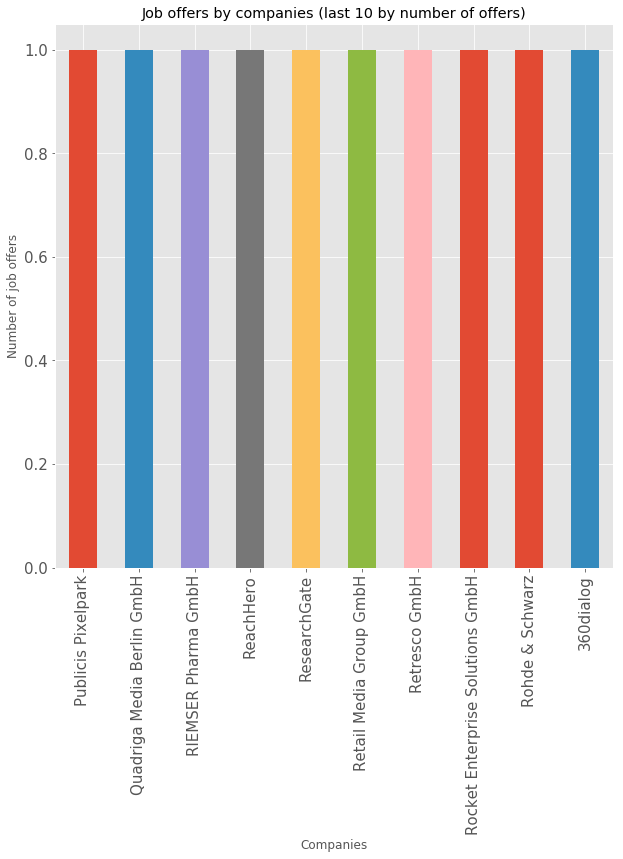

In [19]:
# last 10 companies per number of job offers
ax = sorted_number_offers[-10:].plot(
    kind='bar',
    figsize=(10,10),
    title="Job offers by companies (last 10 by number of offers)",
    fontsize=15
)
ax.set(xlabel='Companies', ylabel='Number of job offers')
plt.show()

In [20]:
grouped['weekday'] = grouped['published_on'].dt.dayofweek

In [21]:
grouped.head()

,job_id,published_on,description,slug,updated_on,company,link,role,weekday
0,68396,2017-10-11 14:15:18,MEDWING is building an end-to-end staffing and...,ruby-on-rails-devop-engineer-mf-medwing,2017-10-11 13:31:20,MEDWING,http://berlinstartupjobs.com/engineering/ruby-...,Ruby on Rails DevOp Engineer (m/f),2
1,68390,2017-10-11 13:43:16,We are looking for a highly motivated System A...,system-administrator-fm-modomoto-curated-shopp...,2017-10-11 13:20:52,Modomoto (Curated Shopping GmbH),http://berlinstartupjobs.com/engineering/syste...,System Administrator (f/m),2
2,68376,2017-10-11 13:33:00,Join our amazing development team and help us ...,senior-frontend-engineer-idagio,2017-10-11 12:58:05,IDAGIO,http://berlinstartupjobs.com/engineering/senio...,Senior Frontend Engineer,2
3,68392,2017-10-11 13:25:40,Panono develops trend-setting digital cameras ...,senior-backend-engineer-panono,2017-10-11 13:25:40,Panono,http://berlinstartupjobs.com/engineering/senio...,SENIOR BACKEND ENGINEER,2
4,68354,2017-10-11 13:02:53,Get the unique opportunity to leave your mark ...,lead-frontend-engineer-loopline-systems,2017-10-11 12:53:38,Loopline Systems,http://berlinstartupjobs.com/engineering/lead-...,Lead Frontend Engineer,2


In [22]:
grouped_by_day = grouped.groupby("weekday")['job_id'].count()

In [23]:
grouped_by_day

weekday
0    137
1    114
2    163
3    162
4    161
5     56
6     40
Name: job_id, dtype: int64

In [24]:
grouped_by_day.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

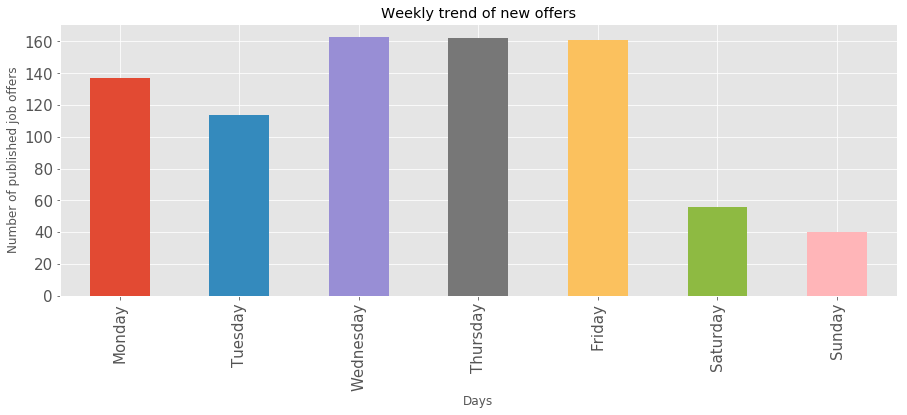

In [25]:
ax = grouped_by_day.plot(
    kind='bar',
    figsize=(15,5),
    title="Weekly trend of new offers",
    fontsize=15)
ax.set(xlabel='Days', ylabel='Number of published job offers')
plt.show()

In [26]:
dt_df = grouped.set_index("published_on")
dt_df = dt_df.loc[:,["job_id"]].resample('D', label="published_on").count()

In [27]:
dt_df.describe()

,job_id
count,76.000000
mean,10.960526
std,7.423280
min,0.000000
25%,5.000000
50%,11.000000
75%,16.250000
max,28.000000


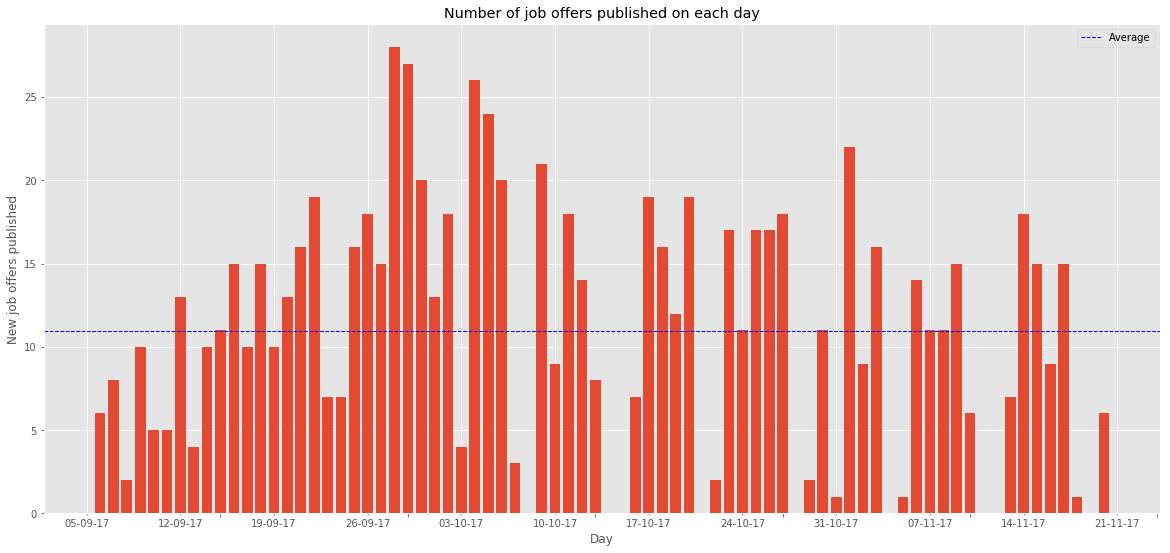

In [28]:
fig, ax = plt.subplots(figsize=(20, 10), )
ax.bar(dt_df.index, dt_df['job_id'], align='center')
ax.axhline(y=dt_df['job_id'].mean(), color='b', label='Average', linestyle='--', linewidth=1)
ax.set(xlabel='Day', ylabel='New job offers published')
ax.legend(*ax.get_legend_handles_labels())
ax.xaxis.set_minor_locator(matplotlib.dates.WeekdayLocator(byweekday=(1),interval=1))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%d-%m-%y'))
ax.xaxis.grid(True, which="minor")
ax.xaxis.grid(False, which="major")
ax.set_title('Number of job offers published on each day')
plt.gcf().autofmt_xdate()
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.show()

In [29]:
month_df = grouped.set_index("published_on").loc[:,["job_id"]]
month_df = month_df.resample('MS', label="published_on").count()

In [30]:
month_offers = pd.Series(month_df['job_id'].values, index=['September', 'October', 'November'])

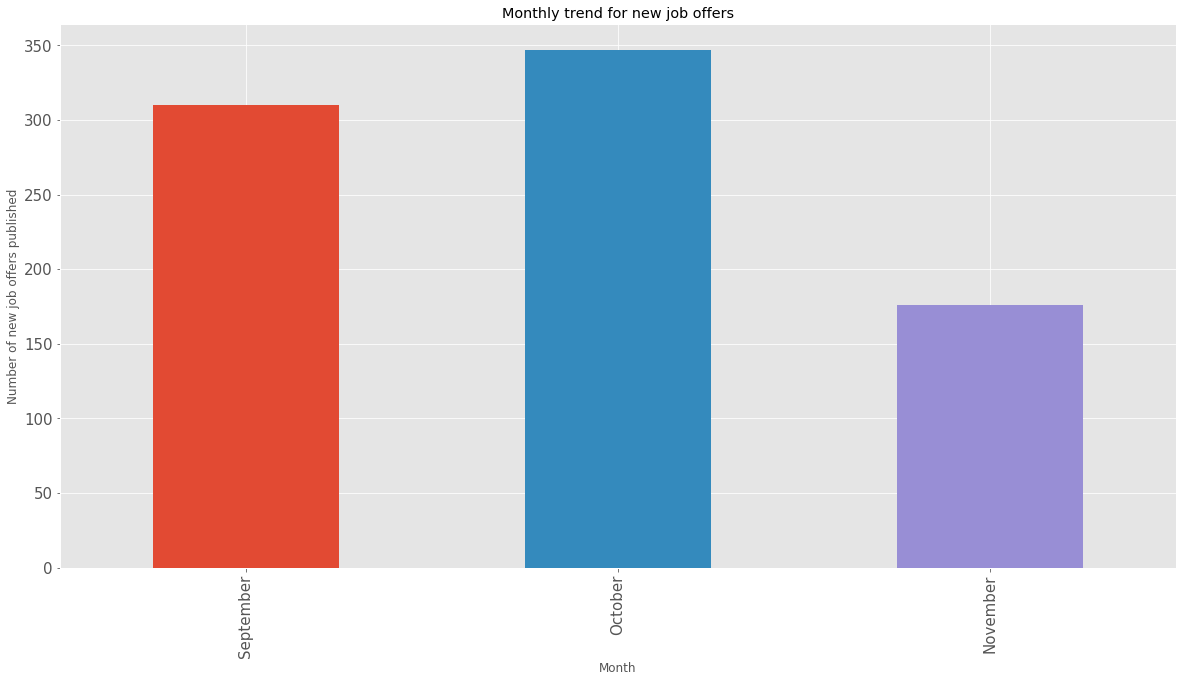

In [31]:
ax = month_offers.plot(
    kind='bar',
    figsize=(20, 10),
    title="Monthly trend for new job offers",
    fontsize=15,
)
ax.set(xlabel='Month', ylabel='Number of new job offers published')
plt.show()

<div class="alert alert-success">
    <b>Exercise:</b> Can you find the most Pythonic companies?
</div>

In [32]:
python_offers = df.loc[df.description.str.contains("python", case=False) ]
pythonic_companies = python_offers.groupby("company")[["job_id"]].count()
pythonic_companies = pythonic_companies[pythonic_companies["job_id"] >10].sort_values(by="job_id", ascending=False)

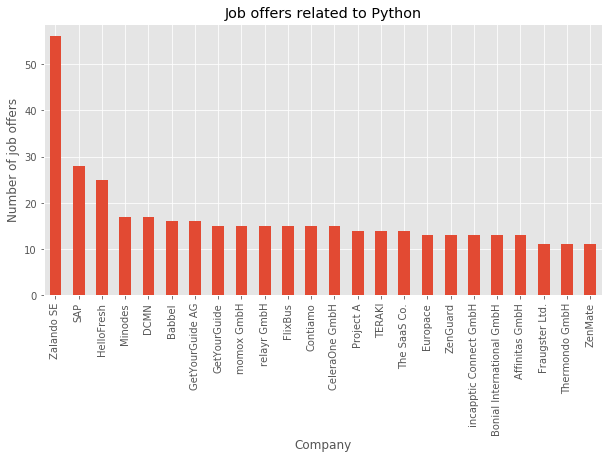

In [33]:
ax = pythonic_companies.plot(
    kind="bar",
    figsize=(10,5),
    legend=False
)
ax.set_title('Job offers related to Python')
ax.set(xlabel='Company', ylabel='Number of job offers')
plt.show()

In [34]:
java_offers = df.loc[df.description.str.contains("java", case=False)]
java_companies = java_offers.groupby("company")[["job_id"]].count()
java_companies = java_companies[java_companies["job_id"] >15].sort_values(by="job_id", ascending=False)

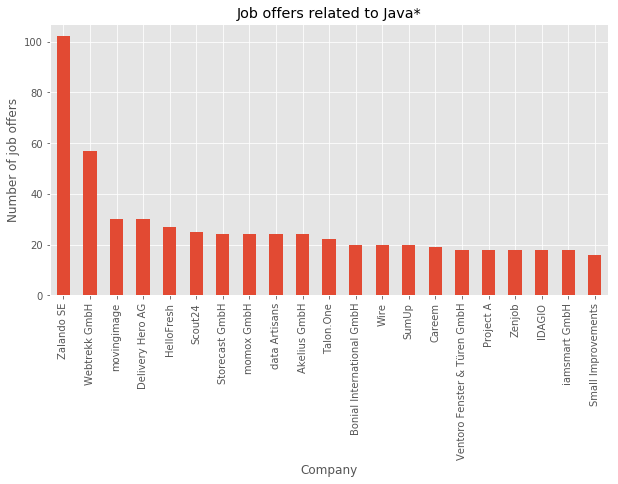

In [35]:
ax = java_companies.plot(
    kind="bar",
    figsize=(10,5),
    legend=False
)
ax.set_title('Job offers related to Java*')
ax.set(xlabel='Company', ylabel='Number of job offers')
plt.show()

In [36]:
data_offers = grouped.loc[df.role.str.contains("data", case=False)]
data_companies = data_offers.groupby("company")[["job_id"]].count()
data_companies = data_companies[data_companies["job_id"] >=2].sort_values(by="job_id", ascending=False)

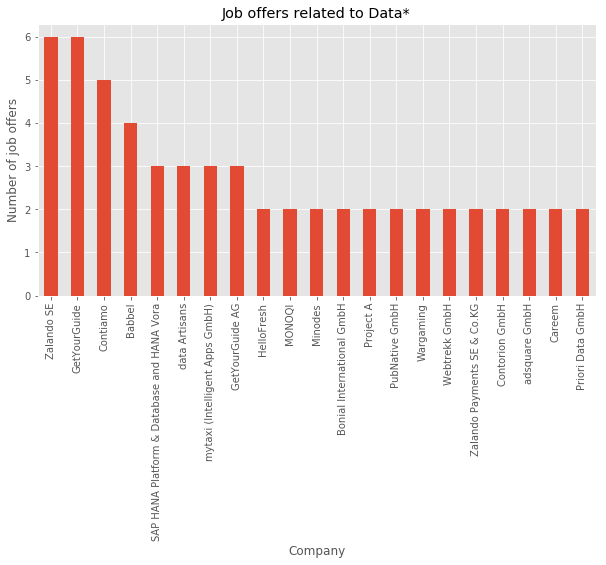

In [37]:
ax = data_companies.plot(
    kind="bar",
    figsize=(10,5),
    legend=False
)
ax.set_title('Job offers related to Data*')
ax.set(xlabel='Company', ylabel='Number of job offers')
plt.show()

In [38]:
len_descriptions = grouped['description'].apply(len)

In [39]:
len_descriptions[len_descriptions > 4500]

43     4675
74     4793
118    5433
143    5211
279    4544
676    4592
695    4886
711    5140
712    4591
756    4857
Name: description, dtype: int64

In [40]:
descriptions = grouped[['job_id', 'description']]

In [41]:
descriptions.head()

,job_id,description
0,68396,MEDWING is building an end-to-end staffing and...
1,68390,We are looking for a highly motivated System A...
2,68376,Join our amazing development team and help us ...
3,68392,Panono develops trend-setting digital cameras ...
4,68354,Get the unique opportunity to leave your mark ...


In [42]:
doc = nlp(descriptions.iloc[0].description)

In [43]:
token_text = [token.orth_ for token in doc]
token_pos = [token.pos_ for token in doc]
token_lemma = [token.lemma_ for token in doc]
token_shape = [token.shape_ for token in doc]

pd.DataFrame(list(zip(token_text, token_lemma, token_shape)),
             columns=['token_text', 'token_lemma', 'token_shape'])

,token_text,token_lemma,token_shape
0,MEDWING,medwing,XXXX
1,is,be,xx
2,building,build,xxxx
3,an,an,xx
4,end,end,xxx
5,-,-,-
6,to,to,xx
7,-,-,-
8,end,end,xxx
9,staffing,staffing,xxxx


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
tfidf = TfidfVectorizer(decode_error='ignore', use_idf=True, max_df=0.5,
                        min_df=2, stop_words='english',
                       )

In [46]:
tfidfOut = tfidf.fit_transform(descriptions.description)

In [47]:
tfidfOut.shape

(833, 8395)

In [48]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,50)

In [49]:
lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(tfidfOut.todense())
xs, ys = lsaOut[:,0], lsaOut[:,1]

In [50]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
km.fit(lsaOut)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
d = pd.DataFrame(lsaOut, columns=['x', 'y'])
d['company'] = grouped['company']
d['description'] = grouped['description']
d['role'] = grouped['role']
d['label'] = km.labels_
colormap = inferno(d['label'].nunique())
colors = [colormap[x] for x in d['label'].values]
bokeh_dat = ColumnDataSource(data=dict(x=d.x.values,y=d.y.values,role=d.role.values, color=colors))

In [52]:
# Plotting with Bokeh
clustering_plot = figure(title='Clustering English vs German offers',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom')
clustering_plot.circle(x='x', y='y',source=bokeh_dat, color='color', size=8.5)
clustering_plot.add_tools( HoverTool(tooltips = u'@role') )
clustering_plot.title.text_font_size = value(u'16pt')
show(clustering_plot);

In [53]:
# 1 for English
# 0 for German
d['label'].value_counts()

0    720
1    113
Name: label, dtype: int64

In [54]:
d.loc[d['label']==0].head()

,x,y,company,description,role,label
0,0.175496,-0.044047,MEDWING,MEDWING is building an end-to-end staffing and...,Ruby on Rails DevOp Engineer (m/f),0
1,0.253840,-0.066106,Modomoto (Curated Shopping GmbH),We are looking for a highly motivated System A...,System Administrator (f/m),0
2,0.174668,-0.038805,IDAGIO,Join our amazing development team and help us ...,Senior Frontend Engineer,0
3,0.272814,-0.061353,Panono,Panono develops trend-setting digital cameras ...,SENIOR BACKEND ENGINEER,0
4,0.315071,-0.075040,Loopline Systems,Get the unique opportunity to leave your mark ...,Lead Frontend Engineer,0


In [55]:
row_index = d['label'] == 0
english_offers = d.loc[row_index, :]
english_offers.is_copy = False

In [56]:
english_offers.shape

(720, 6)

In [57]:
tfidf = TfidfVectorizer(decode_error='ignore', use_idf=True, max_df=0.5,
                        min_df=2, stop_words='english',
                       )
tfidfOut = tfidf.fit_transform(english_offers.description)
lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(tfidfOut.todense())
n_clusters = 5
km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
km.fit(lsaOut)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
english_offers.loc[:,'label'] = km.labels_
english_offers.loc[:, 'x'] = lsaOut[:,0]
english_offers.loc[:, 'y'] = lsaOut[:,1]

In [59]:
english_offers.head()

,x,y,company,description,role,label
0,0.175970,-0.052777,MEDWING,MEDWING is building an end-to-end staffing and...,Ruby on Rails DevOp Engineer (m/f),1
1,0.253034,-0.061732,Modomoto (Curated Shopping GmbH),We are looking for a highly motivated System A...,System Administrator (f/m),3
2,0.174516,-0.077529,IDAGIO,Join our amazing development team and help us ...,Senior Frontend Engineer,1
3,0.274323,-0.066320,Panono,Panono develops trend-setting digital cameras ...,SENIOR BACKEND ENGINEER,3
4,0.312939,-0.103629,Loopline Systems,Get the unique opportunity to leave your mark ...,Lead Frontend Engineer,3


In [60]:
colormap = inferno(english_offers['label'].nunique())
colors = [colormap[x] for x in english_offers['label'].values]
bokeh_dat = ColumnDataSource(
    data=dict(
        x=english_offers.x.values,
        y=english_offers.y.values,
        role=english_offers.role.values,
        color=colors
    )
)

In [61]:
# create the plot and configure the
# title, dimensions, and tools
title = f"Clusters of english job offers (n={n_clusters}) after LSA"
cluster_plot = figure(title=title,
                   plot_width = 900,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom')

# draw the words as circles on the plot
cluster_plot.circle(x='x', y='y', source=bokeh_dat, color='color', size=8.5)

# add our DataFrame as a ColumnDataSource for Bokeh

# add a hover tool to display words on roll-over
cluster_plot.add_tools( HoverTool(tooltips = u'@role') )

# configure visual elements of the plot
cluster_plot.title.text_font_size = value(u'16pt')

show(cluster_plot);